In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import scipy.io as spio
import scipy.stats
import tensorflow
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from attention import attention
# from attention_1 import attention as att
import math
from scipy.stats import zscore

In [2]:
data = spio.loadmat("Salinas.mat")["salinas"]   
data_gt = spio.loadmat('Salinas_gt.mat')['salinas_gt']
data_norm = zscore(data)

In [3]:
data_norm.shape

(512, 217, 224)

In [4]:
data_norm1 = np.reshape(data_norm, (1,512, 217, 224))

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x167d9221188>)

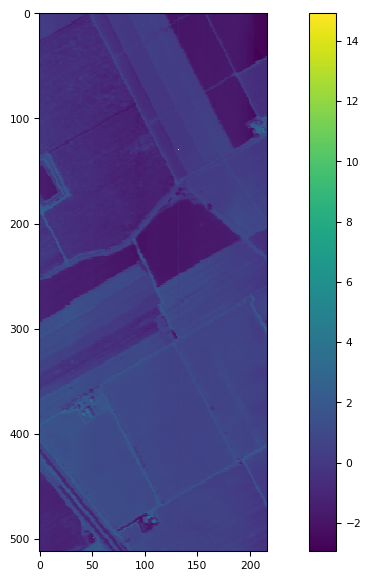

In [5]:
import tifffile
tifffile.imshow(data_norm[:,:,117])

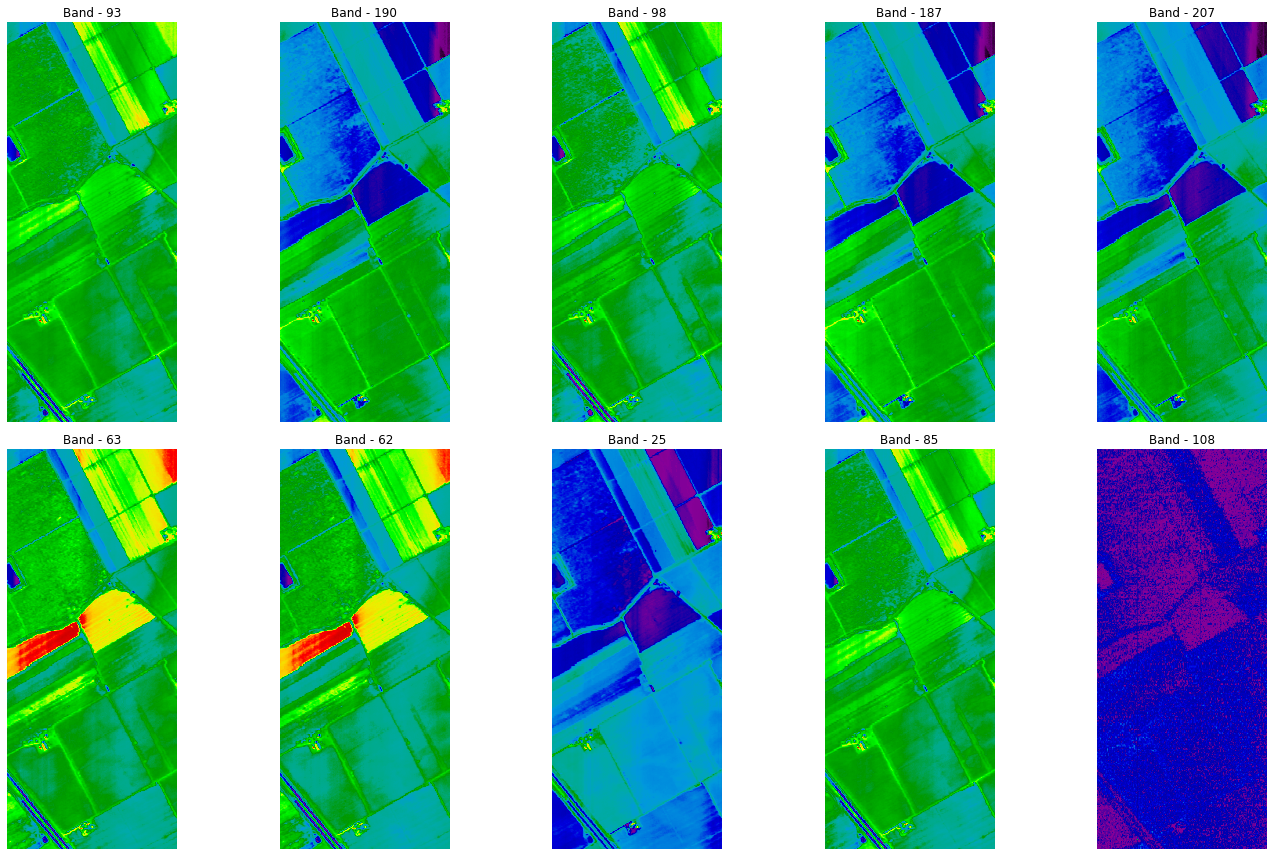

In [6]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(224)
        ax[i][j].imshow(data_norm[:, :, c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [8]:
opt = Adam(lr=0.0009, beta_1=0.9,beta_2 = 0.999)
import tensorflow_transform as tft
# import tensorflow_transform.beam as tft_beam

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
data_transform=data_norm.reshape(512* 217,-1)

In [9]:
from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

In [10]:
trans=quantile_transformer.fit_transform(data_transform)

In [11]:
trans=trans.reshape(512, 217,-1)

In [12]:
trans.shape

(512, 217, 224)

In [87]:
data_norm=np.array(data_norm)

In [89]:
brc=np.moveaxis(data_norm,-1,0)

In [90]:
brc.shape

(224, 512, 217)

In [95]:
brc=brc.reshape(1,224,512,217)

In [13]:
im_rgb = data_norm[:, :, ::-1]

In [65]:
im_rgb.shape

(512, 217, 224)

In [5]:
rgb = data_norm.reshape(224,512,217)

In [67]:
rgb.shape

(224, 512, 217)

In [ ]:
br = rgb[...,[2,0,1]]

In [16]:
rgb

array([[[-0.90705472, -0.79972488, -0.46030653, ...,  0.24759061,
          0.17464135,  0.19295369],
        [ 0.09627352,  0.12514271,  0.11202509, ...,  0.21185457,
          0.2482507 ,  0.24384243],
        [ 0.24411683,  0.203619  ,  0.21806103, ...,  0.22737266,
          0.25411888,  0.2809876 ],
        ...,
        [-0.65552608, -0.61566819, -0.60702812, ..., -0.60589005,
         -0.59079538, -0.59039419],
        [-0.59497172, -0.67776882, -0.74184975, ..., -0.6321419 ,
         -0.62812144, -0.61327263],
        [-0.63250823, -0.64069569, -0.67766181, ..., -1.14004452,
         -0.7114689 , -0.4000342 ]],

       [[-1.02759957, -0.00836939, -1.28125619, ..., -0.58746044,
         -0.54430761, -0.5900034 ],
        [-0.52168139, -0.61107486, -0.65189134, ..., -0.29428201,
         -0.27004063, -0.35059101],
        [-0.30218474, -0.40249718, -0.33611367, ...,  0.03517922,
          0.04607847,  0.08130092],
        ...,
        [-1.66718312, -1.68474797, -1.71092625, ..., -

In [72]:
rgb=np.reshape(rgb, (1,224, 512, 217))

In [73]:
rgb.shape

(1, 224, 512, 217)

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x2bc8d951108>)

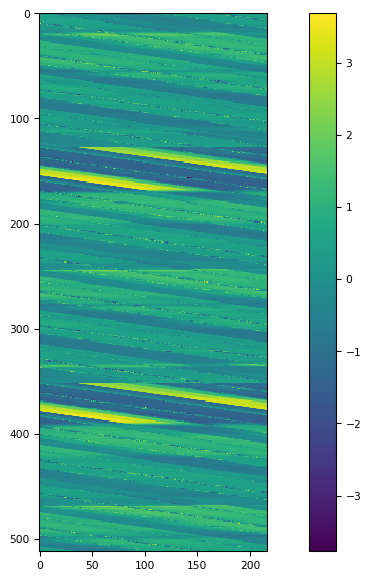

In [45]:
tifffile.imshow(rgb[117,:,:])

In [6]:
import math
from skimage.metrics import structural_similarity
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  

def ssim(y_true,y_pred):
    data1 = np.squeeze(y_true)
    data2 = np.squeeze(y_pred)
    return structural_similarity(data1,data2)
# def metrics(y_true,y_pred):
    

In [9]:
import os
 
file_size = os.path.getsize('salinas.mat')
print("File Size is :", file_size, "bytes")

File Size is : 27605707 bytes


In [53]:
def custom_loss1(input):
    def loss1(y_true, y_pred):
        return tf.norm(input - y_pred) # use your custom loss 1
    return loss1

def custom_loss2(y_true, y_pred):
    return categorical_crossentropy(y_true, y_pred)


In [50]:
# encode=keras.Model()
encoder=Sequential()
# encoder.add(encode)
encoder.add(Conv2D(224,(2,2),activation='relu',padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(128,(2,2),activation='relu' ,padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(128,(2,2),activation='relu' ,padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(64,(2,2),activation='relu' ,padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(32,(2,2),activation='relu',padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.compile(optimizer = opt, metrics = "mse", loss = "mse")
# encoder.summary()

In [51]:
decoder=Sequential()
decoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(128,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(128,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(224,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(224,(2,2),activation='tanh'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Resizing(512,217))
decoder.compile(optimizer = opt, metrics = "mse", loss = "mse")
# decoder.summary()

In [52]:
model = Sequential()
model.add(encoder)
model.add(decoder)


In [53]:
model.compile(optimizer=opt, loss='mse', metrics = "mse")

model.fit(data_norm1, data_norm1, epochs = 350)

Epoch 1/350
1/1 [==============================] - 6s 6s/step - loss: 1.0011 - mse: 1.0011
Epoch 2/350
1/1 [==============================] - 3s 3s/step - loss: 0.9980 - mse: 0.9980
Epoch 3/350
1/1 [==============================] - 3s 3s/step - loss: 0.9545 - mse: 0.9545
Epoch 4/350
1/1 [==============================] - 3s 3s/step - loss: 0.9162 - mse: 0.9162
Epoch 5/350
1/1 [==============================] - 3s 3s/step - loss: 0.9086 - mse: 0.9086
Epoch 6/350
1/1 [==============================] - 3s 3s/step - loss: 1.6805 - mse: 1.6805
Epoch 7/350
1/1 [==============================] - 3s 3s/step - loss: 1.0046 - mse: 1.0046
Epoch 8/350
1/1 [==============================] - 3s 3s/step - loss: 1.5065 - mse: 1.5065
Epoch 9/350
1/1 [==============================] - 3s 3s/step - loss: 1.2510 - mse: 1.2510
Epoch 10/350
1/1 [==============================] - 3s 3s/step - loss: 0.8914 - mse: 0.8914
Epoch 11/350
1/1 [==============================] - 3s 3s/step - loss: 1.0000 - mse: 1.00

1/1 [==============================] - 3s 3s/step - loss: 0.3122 - mse: 0.3122
Epoch 91/350
1/1 [==============================] - 4s 4s/step - loss: 0.3104 - mse: 0.3104
Epoch 92/350
1/1 [==============================] - 3s 3s/step - loss: 0.3095 - mse: 0.3095
Epoch 93/350
1/1 [==============================] - 3s 3s/step - loss: 0.3086 - mse: 0.3086
Epoch 94/350
1/1 [==============================] - 3s 3s/step - loss: 0.3077 - mse: 0.3077
Epoch 95/350
1/1 [==============================] - 3s 3s/step - loss: 0.3073 - mse: 0.3073
Epoch 96/350
1/1 [==============================] - 3s 3s/step - loss: 0.3067 - mse: 0.3067
Epoch 97/350
1/1 [==============================] - 3s 3s/step - loss: 0.3058 - mse: 0.3058
Epoch 98/350
1/1 [==============================] - 3s 3s/step - loss: 0.3049 - mse: 0.3049
Epoch 99/350
1/1 [==============================] - 4s 4s/step - loss: 0.3042 - mse: 0.3042
Epoch 100/350
1/1 [==============================] - 3s 3s/step - loss: 0.3032 - mse: 0.3032


1/1 [==============================] - 3s 3s/step - loss: 0.2769 - mse: 0.2769
Epoch 179/350
1/1 [==============================] - 3s 3s/step - loss: 0.2770 - mse: 0.2770
Epoch 180/350
1/1 [==============================] - 3s 3s/step - loss: 0.2772 - mse: 0.2772
Epoch 181/350
1/1 [==============================] - 3s 3s/step - loss: 0.2771 - mse: 0.2771
Epoch 182/350
1/1 [==============================] - 3s 3s/step - loss: 0.2770 - mse: 0.2770
Epoch 183/350
1/1 [==============================] - 3s 3s/step - loss: 0.2772 - mse: 0.2772
Epoch 184/350
1/1 [==============================] - 3s 3s/step - loss: 0.2774 - mse: 0.2774
Epoch 185/350
1/1 [==============================] - 3s 3s/step - loss: 0.2776 - mse: 0.2776
Epoch 186/350
1/1 [==============================] - 3s 3s/step - loss: 0.2769 - mse: 0.2769
Epoch 187/350
1/1 [==============================] - 3s 3s/step - loss: 0.2762 - mse: 0.2762
Epoch 188/350
1/1 [==============================] - 3s 3s/step - loss: 0.2762 - mse

1/1 [==============================] - 3s 3s/step - loss: 0.2676 - mse: 0.2676
Epoch 267/350
1/1 [==============================] - 3s 3s/step - loss: 0.2673 - mse: 0.2673
Epoch 268/350
1/1 [==============================] - 3s 3s/step - loss: 0.2670 - mse: 0.2670
Epoch 269/350
1/1 [==============================] - 3s 3s/step - loss: 0.2671 - mse: 0.2671
Epoch 270/350
1/1 [==============================] - 3s 3s/step - loss: 0.2670 - mse: 0.2670
Epoch 271/350
1/1 [==============================] - 3s 3s/step - loss: 0.2668 - mse: 0.2668
Epoch 272/350
1/1 [==============================] - 3s 3s/step - loss: 0.2667 - mse: 0.2667
Epoch 273/350
1/1 [==============================] - 3s 3s/step - loss: 0.2668 - mse: 0.2668
Epoch 274/350
1/1 [==============================] - 4s 4s/step - loss: 0.2668 - mse: 0.2668
Epoch 275/350
1/1 [==============================] - 3s 3s/step - loss: 0.2668 - mse: 0.2668
Epoch 276/350
1/1 [==============================] - 3s 3s/step - loss: 0.2666 - mse

In [133]:
model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_70 (Sequential)  (None, 32, 13, 32)        356800    
                                                                 
 sequential_71 (Sequential)  (None, 512, 217, 224)     439104    
                                                                 
Total params: 795,904
Trainable params: 795,904
Non-trainable params: 0
_________________________________________________________________


In [134]:
encoder.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 512, 217, 224)     200928    
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 256, 108, 224)    0         
 g2D)                                                            
                                                                 
 conv2d_211 (Conv2D)         (None, 256, 108, 128)     114816    
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 128, 54, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_212 (Conv2D)         (None, 128, 54, 64)       32832     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 64, 27, 64)     

In [135]:
decoder.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_214 (Conv2D)         (None, 32, 13, 64)        8256      
                                                                 
 up_sampling2d_121 (UpSampli  (None, 64, 26, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_215 (Conv2D)         (None, 64, 26, 64)        16448     
                                                                 
 up_sampling2d_122 (UpSampli  (None, 128, 52, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_216 (Conv2D)         (None, 128, 52, 128)      32896     
                                                                 
 up_sampling2d_123 (UpSampli  (None, 256, 104, 128)  

In [54]:
data_gen = model.predict(data_norm1)

In [55]:
psnr=PSNR(data_norm1,data_gen)
psnr

53.924451494459376

In [ ]:
53.6
53.9
54.07

In [56]:
import os
data_enc=encoder.predict(data_norm1)
tifffile.imsave("data_enc.tiff", data_enc)
stats_enc = os.stat("data_enc.tiff")
stats_data = os.stat("Salinas.mat")    
print(stats_data.st_size/stats_enc.st_size)

6014.315250544662


In [57]:
stats_enc.st_size

4590

In [58]:
import pickle
dict_={'indian_pines':data_encoded}
pickle_out = open("dict.pickle","wb")
pickle.dump(dict_, pickle_out)
pickle_out.close()

In [60]:
file_size1 = os.path.getsize('dict.pickle')
file_size1

3258

In [63]:
from scipy.io import savemat
savemat('dict.mat',dict_)
file_size2 = os.path.getsize('dict.mat')
file_size2

3280

In [64]:
stats_data.st_size/file_size1

8473.2065684469

In [30]:
import os

file_size = os.path.getsize('Salinas.mat')
print("File Size is :", file_size, "megabytes")
file_size1 = os.path.getsize('data_enc.tiff')
print("File Size is :", file_size1, "megabytes")
file_size/file_size1

File Size is : 27605707 megabytes
File Size is : 3258 megabytes


8473.2065684469

In [145]:
flat=np.ndarray.flatten(data_norm)
corre=np.corrcoef(flat)

In [146]:
corre

1.0

In [153]:
import seaborn as sns


In [152]:
df=pd.DataFrame(data_norm.reshape(512*217,-1))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,-0.907055,-0.799725,-0.460307,-0.099122,-0.047730,0.068236,0.025750,0.069674,0.042947,0.039600,...,0.247591,0.174641,0.192954,0.096274,0.125143,0.112025,0.396878,0.112219,0.102112,0.166411
1,-0.942870,-0.855567,-1.168903,-0.090265,-0.057742,-0.098981,0.018124,0.056929,0.036995,0.032014,...,0.206214,0.194485,0.237636,0.149805,0.196293,0.170827,0.396047,0.115255,-0.048517,0.990669
2,-0.915450,-0.809883,-0.499698,-0.096394,-0.169231,-0.105335,-0.043459,-0.083718,-0.038040,-0.055092,...,0.092585,0.129000,0.111286,0.075929,0.140474,0.108832,0.106212,0.103930,-0.382441,0.454455
3,-0.839370,-0.762930,-0.498667,-0.337008,-0.069031,-0.036110,-0.125380,-0.182337,-0.115318,-0.092726,...,0.054093,0.093335,0.036429,0.133209,0.027057,-0.004089,0.096314,0.110926,0.253745,-0.139726
4,-2.116072,-0.749800,-0.485857,-0.332260,-0.178117,-0.117136,-0.192677,-0.139794,-0.185005,-0.121356,...,0.003747,0.081763,0.000280,-0.084666,0.019153,-0.005964,-0.169115,-0.110858,0.057848,-0.352870


<AxesSubplot:>

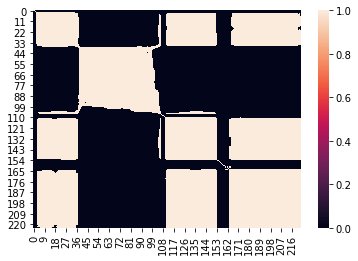

In [155]:
sns.heatmap(df.corr()>0.7)

<AxesSubplot:>

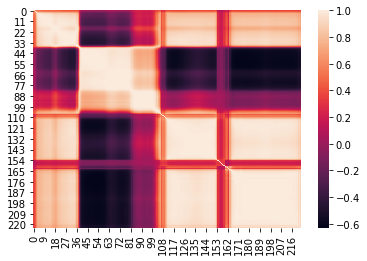

In [156]:
sns.heatmap(df.corr())

In [9]:
# encode=keras.Model()
encoder=Sequential()
# encoder.add(encode)
# encoder.add(Conv2D(224,(2,2),activation='relu',padding='same'))
# encoder.add(MaxPooling2D(pool_size = (2, 2)))
# encoder.add(Conv2D(128,(2,2),activation='relu' ,padding='same'))
# encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(128,(2,2),activation='relu' ,padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(64,(2,2),activation='relu' ,padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))
# encoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
# encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(Conv2D(32,(2,2),activation='relu',padding='same'))
encoder.add(MaxPooling2D(pool_size = (2, 2)))


encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))

decoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(64,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(128,(2,2),activation='relu',padding='same'))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(128,(2,2),activation='relu',padding='same'))
# decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(224,(2,2),activation='relu',padding='same'))
# decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2D(224,(2,2),activation='tanh'))
# decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Resizing(512,217))
decoder.compile(optimizer = opt, metrics = "mse", loss = "mse")
# decoder.summary()



model = Sequential()
model.add(encoder)
model.add(decoder)




In [10]:
model.compile(optimizer = opt, metrics = "mse", loss = "mse")

model.fit(data_norm1, data_norm1, epochs = 350)

Epoch 1/350
1/1 [==============================] - 3s 3s/step - loss: 1.0013 - mse: 1.0013
Epoch 2/350
1/1 [==============================] - 1s 1s/step - loss: 0.9996 - mse: 0.9996
Epoch 3/350
1/1 [==============================] - 1s 1s/step - loss: 0.9894 - mse: 0.9894
Epoch 4/350
1/1 [==============================] - 1s 1s/step - loss: 0.9034 - mse: 0.9034
Epoch 5/350
1/1 [==============================] - 1s 1s/step - loss: 0.7710 - mse: 0.7710
Epoch 6/350
1/1 [==============================] - 2s 2s/step - loss: 0.6782 - mse: 0.6782
Epoch 7/350
1/1 [==============================] - 2s 2s/step - loss: 0.5732 - mse: 0.5732
Epoch 8/350
1/1 [==============================] - 2s 2s/step - loss: 0.5252 - mse: 0.5252
Epoch 9/350
1/1 [==============================] - 2s 2s/step - loss: 0.4921 - mse: 0.4921
Epoch 10/350
1/1 [==============================] - 2s 2s/step - loss: 0.4684 - mse: 0.4684
Epoch 11/350
1/1 [==============================] - 2s 2s/step - loss: 0.4450 - mse: 0.44

1/1 [==============================] - 2s 2s/step - loss: 0.2838 - mse: 0.2838
Epoch 91/350
1/1 [==============================] - 2s 2s/step - loss: 0.2827 - mse: 0.2827
Epoch 92/350
1/1 [==============================] - 2s 2s/step - loss: 0.2823 - mse: 0.2823
Epoch 93/350
1/1 [==============================] - 2s 2s/step - loss: 0.2822 - mse: 0.2822
Epoch 94/350
1/1 [==============================] - 2s 2s/step - loss: 0.2818 - mse: 0.2818
Epoch 95/350
1/1 [==============================] - 2s 2s/step - loss: 0.2811 - mse: 0.2811
Epoch 96/350
1/1 [==============================] - 2s 2s/step - loss: 0.2811 - mse: 0.2811
Epoch 97/350
1/1 [==============================] - 2s 2s/step - loss: 0.2818 - mse: 0.2818
Epoch 98/350
1/1 [==============================] - 2s 2s/step - loss: 0.2832 - mse: 0.2832
Epoch 99/350
1/1 [==============================] - 2s 2s/step - loss: 0.2862 - mse: 0.2862
Epoch 100/350
1/1 [==============================] - 2s 2s/step - loss: 0.2896 - mse: 0.2896


1/1 [==============================] - 2s 2s/step - loss: 0.2643 - mse: 0.2643
Epoch 179/350
1/1 [==============================] - 2s 2s/step - loss: 0.2641 - mse: 0.2641
Epoch 180/350
1/1 [==============================] - 2s 2s/step - loss: 0.2640 - mse: 0.2640
Epoch 181/350
1/1 [==============================] - 2s 2s/step - loss: 0.2641 - mse: 0.2641
Epoch 182/350
1/1 [==============================] - 2s 2s/step - loss: 0.2645 - mse: 0.2645
Epoch 183/350
1/1 [==============================] - 2s 2s/step - loss: 0.2653 - mse: 0.2653
Epoch 184/350
1/1 [==============================] - 2s 2s/step - loss: 0.2666 - mse: 0.2666
Epoch 185/350
1/1 [==============================] - 2s 2s/step - loss: 0.2675 - mse: 0.2675
Epoch 186/350
1/1 [==============================] - 2s 2s/step - loss: 0.2667 - mse: 0.2667
Epoch 187/350
1/1 [==============================] - 2s 2s/step - loss: 0.2649 - mse: 0.2649
Epoch 188/350
1/1 [==============================] - 2s 2s/step - loss: 0.2640 - mse

1/1 [==============================] - 2s 2s/step - loss: 0.2561 - mse: 0.2561
Epoch 267/350
1/1 [==============================] - 2s 2s/step - loss: 0.2560 - mse: 0.2560
Epoch 268/350
1/1 [==============================] - 2s 2s/step - loss: 0.2560 - mse: 0.2560
Epoch 269/350
1/1 [==============================] - 2s 2s/step - loss: 0.2561 - mse: 0.2561
Epoch 270/350
1/1 [==============================] - 2s 2s/step - loss: 0.2566 - mse: 0.2566
Epoch 271/350
1/1 [==============================] - 2s 2s/step - loss: 0.2572 - mse: 0.2572
Epoch 272/350
1/1 [==============================] - 2s 2s/step - loss: 0.2574 - mse: 0.2574
Epoch 273/350
1/1 [==============================] - 2s 2s/step - loss: 0.2568 - mse: 0.2568
Epoch 274/350
1/1 [==============================] - 2s 2s/step - loss: 0.2556 - mse: 0.2556
Epoch 275/350
1/1 [==============================] - 2s 2s/step - loss: 0.2553 - mse: 0.2553
Epoch 276/350
1/1 [==============================] - 2s 2s/step - loss: 0.2560 - mse

In [11]:
data_gen = model.predict(data_norm1)

In [12]:
psnr=PSNR(data_norm1,data_gen)
psnr

54.12115841132867

In [13]:
ssim=ssim(data_norm1,data_gen)
ssim

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


0.44363058452953474

In [14]:
import os
data_enc=encoder.predict(data_norm1)
tifffile.imsave("data_enc.tiff", data_enc)
stats_enc = os.stat("data_enc.tiff")
stats_data = os.stat("Salinas.mat")    
print(stats_data.st_size/stats_enc.st_size)

835.5238196125908
